# Modern Portfolio Theory

## Step 1
- We begin with imports and by definining the list of stocks to be analyzed.
- I have taken stocks from Macy's, Tesla, Google, Amazon, Walmart and Apple. 
- Since Modern Portfolio Theory relies on historical data, I have taken the start date to be Jan 1, 2012 and the end date as Jan 1, 2020.
- Data is downloaded from 'Yahoo! Finance' using pandas_datareader.


In [79]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
from scipy.optimize import minimize

In [80]:
#data selection
stocks = ['TSLA','GOOG','AMZN','DB','WMT','AAPL']
start_date = '01/01/2012'
end_date = '01/01/2020'

In [81]:
#downloading the data
def get_data():
    data = web.DataReader(stocks, data_source='yahoo', start=start_date, end=end_date)['Adj Close']
    return data

data = get_data()

## Step 2
- Calculate the returns using the formula ($p_{n}$ - $p_{n-1}$) / $p_{n-1}$ which is the same as $p_{n}$ / $p_{n-1}$ - 1
- Taking log to normalize returns and since log(1) = 0, returns = log($p_{n}$ / $p_{n-1}$) 
- We then find the mean and covariance matrix
- Covariance measures how much two random variables vary together and this is a good estimator for risk
- Markowitz’s theory suggests that owning stocks with high positive covariance is not good diversifiaction and we know that the aim of diversification is to eliminate fluctuations in the long term, thereby indicating that uncorrelated stocks are better


In [82]:
returns = np.log(data/data.shift(1))

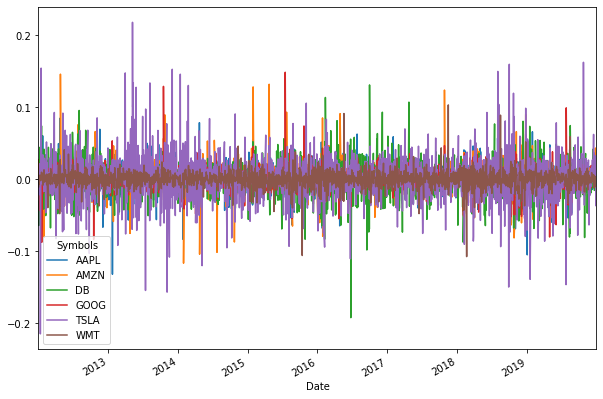

In [83]:
def plot_daily_returns(data):
    data.plot(figsize=(10,7))
plot_daily_returns(returns)

In [76]:
#print mean and cov between start and end date, there are 252 trading days in a year
def show_statistics():
    print(returns.mean()*252)
    print(returns.cov()*252)

In [77]:
show_statistics()

Symbols
AAPL    0.219080
AMZN    0.292503
DB     -0.181485
GOOG    0.174769
TSLA    0.338491
WMT     0.110477
dtype: float64
Symbols      AAPL      AMZN        DB      GOOG      TSLA       WMT
Symbols                                                            
AAPL     0.065616  0.027136  0.025876  0.025027  0.029939  0.009006
AMZN     0.027136  0.087087  0.029439  0.038107  0.041240  0.009586
DB       0.025876  0.029439  0.131672  0.026022  0.035433  0.011474
GOOG     0.025027  0.038107  0.026022  0.053425  0.031293  0.008709
TSLA     0.029939  0.041240  0.035433  0.031293  0.245746  0.011243
WMT      0.009006  0.009586  0.011474  0.008709  0.011243  0.031322


## Step 3
- We assume that randomly there are weights assigned to the stocks and 100% of the wealth is divided
- This random selection occcurs 10000 times for which the returns and varuances are calculated
- This is the Monte Carlo Simulation
- The graph represent different portfolios for different weight combinations

In [86]:
#Monte Carlo Simulation
def generate_portfolios(returns, weights):
    preturns = []
    pvariances = []
    for i in range(10000):
        weights = np.random.random(len(stocks))
        #making sure the sum = 1.0
        weights /= np.sum(weights)
        preturns.append(np.sum(returns.mean()*weights)*252)
        pvariances.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights))))
    preturns = np.array(preturns)
    pvariances = np.array(pvariances)
    return preturns, pvariances

portfolios = generate_portfolios(returns, weights)
preturns = portfolios[0]
pvariances = portfolios[1]

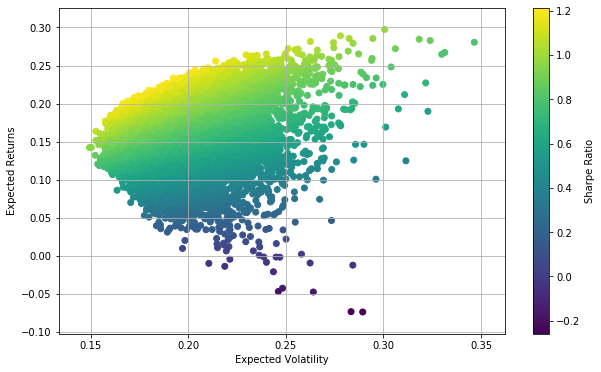

In [88]:
def plot(returns, variances):
    plt.figure(figsize=(10,6))
    plt.scatter(variances, returns, c=returns/variances, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Returns')
    plt.colorbar(label="Sharpe Ratio")
    
plot(preturns , pvariances)

In [63]:
def statistics(weights, returns):
    portfolio_return = np.sum(returns.mean()*weights)*252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    return np.array([portfolio_return, portfolio_volatility, portfolio_return/portfolio_volatility])

stat = statistics(weights, returns)
stat

array([0.1122701 , 0.23117532, 0.48564915])

## Step 4
- It is now key to find the optimal portfolio. 
- An investor is interested in (a) the maximum return given a fixed risk level, or (b) minimum risk given a fixed return
- A good risk/return measure is the Sharpe Ratio. It describes how much excess return you are receiving for extra volatility that you endure holding a riskier asset (stock). A Sharpe Ratio > 1 is considered to be good




In [64]:
def min_func_sharpe(weights, returns):
    # '-' used because we need the max value
    return -statistics(weights, returns)[2]

def optimize_portfolio(weights, returns):
    constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1}) #sum of weights = 1
    bounds = tuple((0,1) for x in range (len(stocks)))
    optimum = minimize(fun=min_func_sharpe, x0=weights, args= returns, method= 'SLSQP',
                       bounds=bounds, constraints=constraints)                 
    return optimum
optimum = optimize_portfolio(weights, returns)

In [65]:
def print_optimal_portfolio(optimum, returns):
    print('Optimal weights:', optimum['x'].round(3))
    print('Expected Return, volatility, Sharpe Ratio:', statistics(optimum['x'].round(3), returns) )

In [66]:
print_optimal_portfolio(optimum, returns)

Optimal weights: [0.26  0.32  0.    0.02  0.099 0.301]
Expected Return, volatility, Sharpe Ratio: [0.22082139 0.17942644 1.2307071 ]


In [67]:
def show_optimal_portfolio(optimum, returns, preturns, pvariances):
    plt.figure(figsize=(10,6))
    plt.scatter(pvariances, preturns, c=preturns/pvariances, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Returns')
    plt.colorbar(label="Sharpe Ratio")
    plt.plot(statistics(optimum['x'], returns)[1], statistics(optimum['x'],returns)[0], 'r*', markersize=20.0)


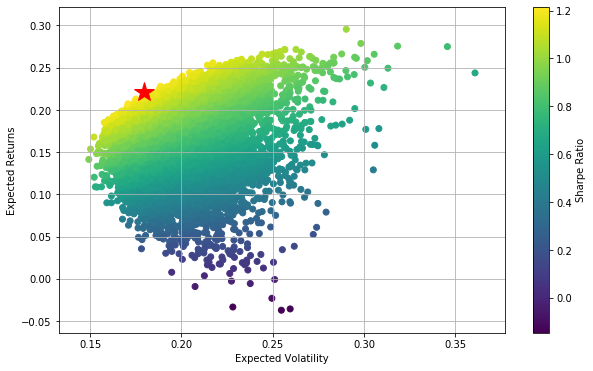

In [68]:
show_optimal_portfolio(optimum, returns, preturns, pvariances)